In [ ]:
import numpy as np
import matplotlib.pyplot as plt


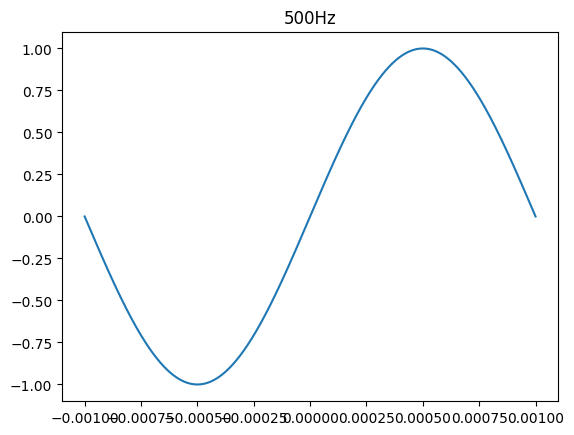

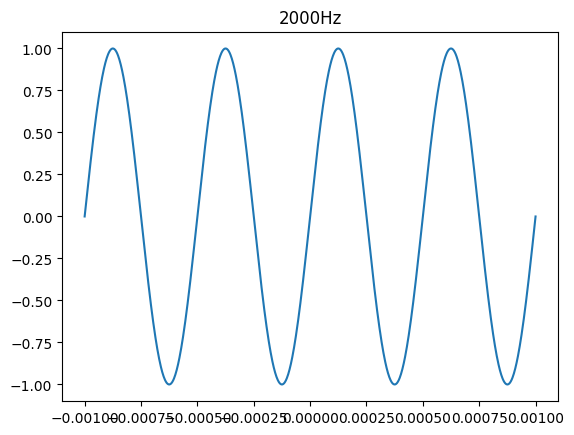

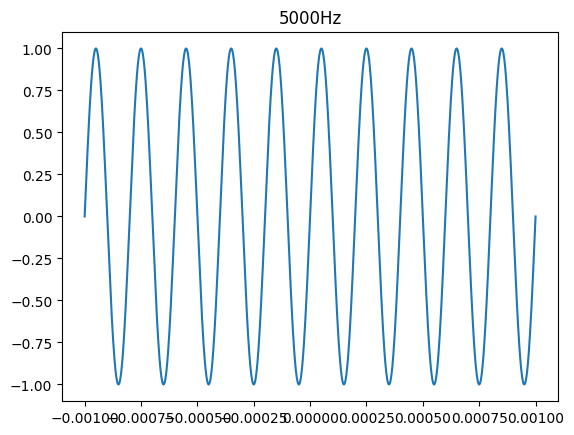

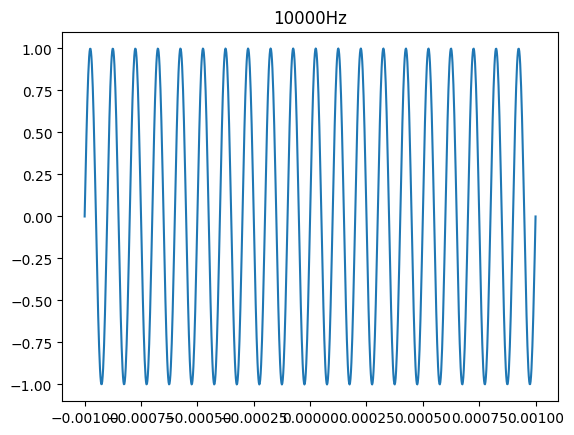

In [25]:
frequencies = [500,2000,5000,10000]
x = np.linspace(-0.001, 0.001, 1000)
sin_array = []

for f in frequencies:
    y = np.sin(x*2*np.pi*f)
    sin_array.append(y)
    plt.plot(x, y)
    plt.title(f"{f}Hz")
    plt.show()



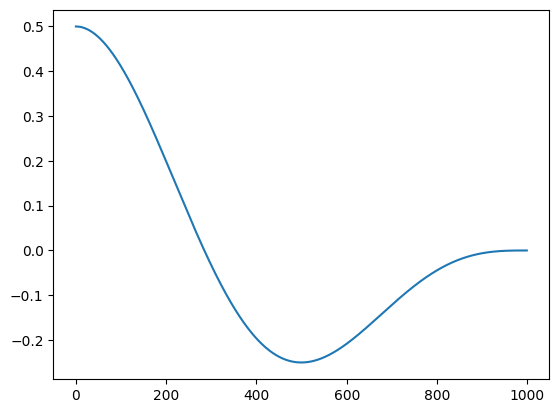

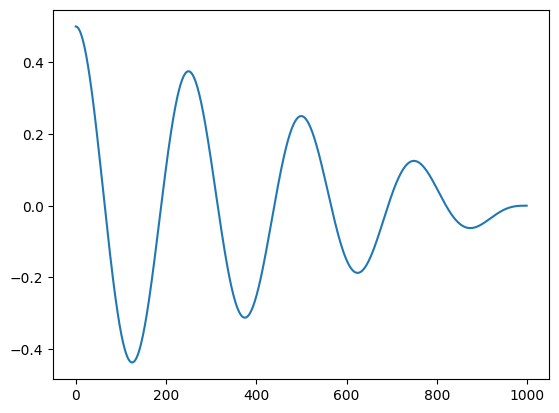

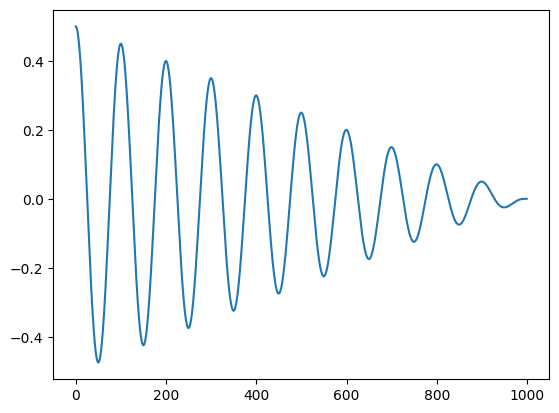

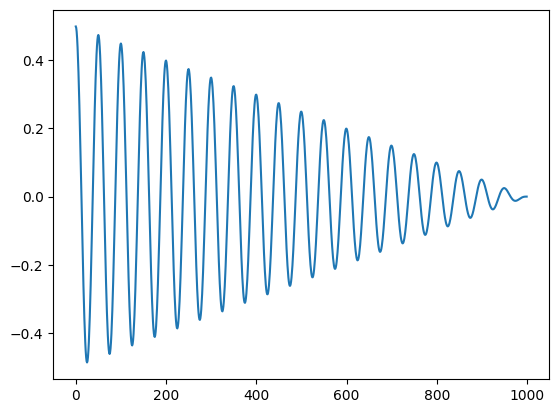

In [ ]:
def compute_discrete_autocorrelation(signal):
    signal = np.asarray(signal)
    n = len(signal)
    autocorr = np.zeros(n)

    for lag in range(n):
        autocorr[lag] = np.sum(signal[:n-lag] * signal[lag:])

    return autocorr/n

correlation_arr = []
for signal in sin_array:
    autocorrelation = compute_discrete_autocorrelation(signal)
    correlation_arr.append(autocorrelation)
    plt.plot(autocorrelation)
    plt.show()



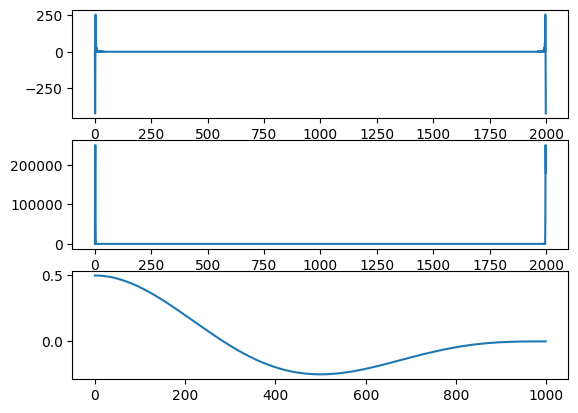

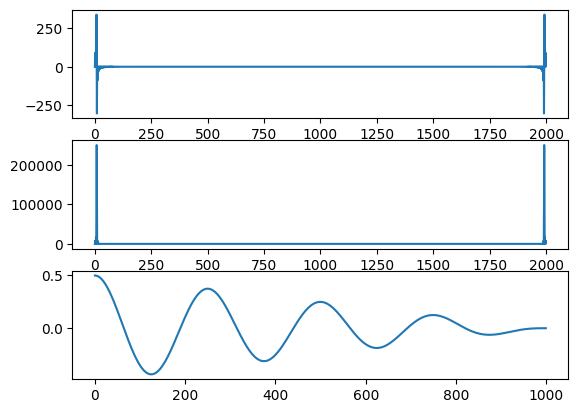

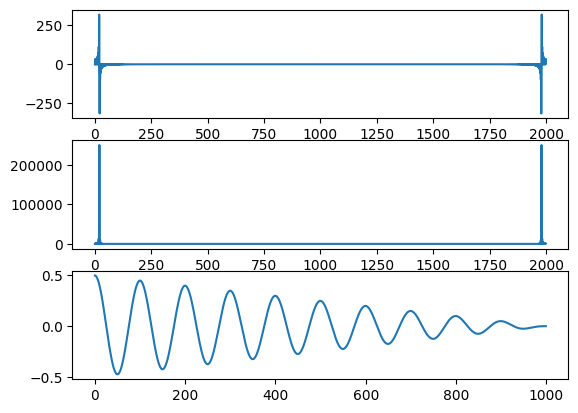

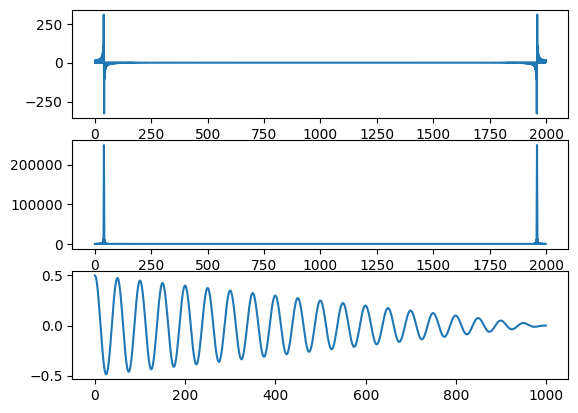

In [40]:
def wiener_khinchin_autocorrelation(signal,plot=False):
    
    signal = np.asarray(signal)
    n = len(signal)
    
    fft_signal = np.fft.fft(signal, n=2*n)  
    psd = np.abs(fft_signal) ** 2
    autocorr = np.fft.ifft(psd).real

    if plot:
        fig, ax = plt.subplots(3, 1)
        ax[0].plot(fft_signal.real)
        ax[1].plot(psd.real)
        ax[2].plot(autocorr[:n]/n)
        plt.show()
    return autocorr[:n]/n

for signal in sin_array:
    autocorrelation = wiener_khinchin_autocorrelation(signal,plot=True)
    

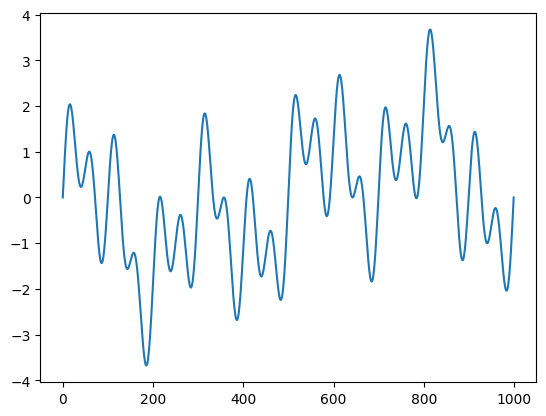

In [32]:
combinedSignals = np.sum(np.array(sin_array),axis=0)
plt.plot(combinedSignals)

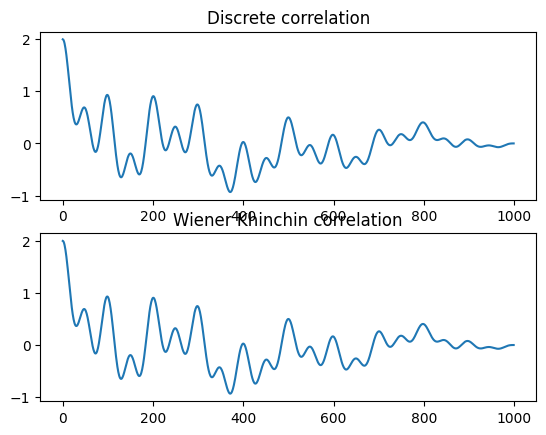

In [41]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(compute_discrete_autocorrelation(combinedSignals))
ax[0].set_title('Discrete correlation')
ax[1].plot(wiener_khinchin_autocorrelation(combinedSignals))
ax[1].set_title('Wiener Khinchin correlation')
plt.show()

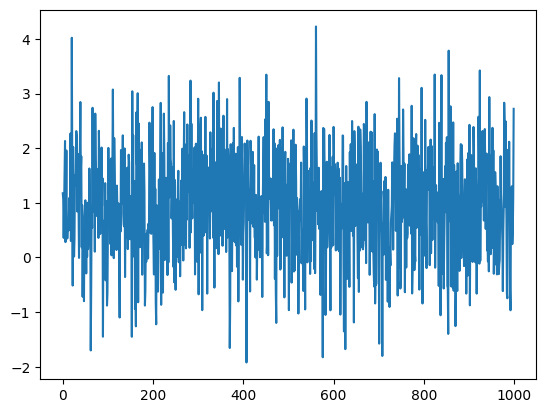

In [59]:
import random

noise_signal = np.array([random.gauss(1) for _ in range(len(signal))])
# noise_signal /= max(noise_signal)
plt.plot(noise_signal)

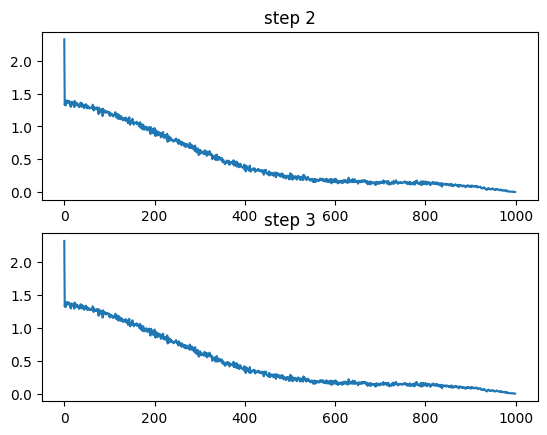

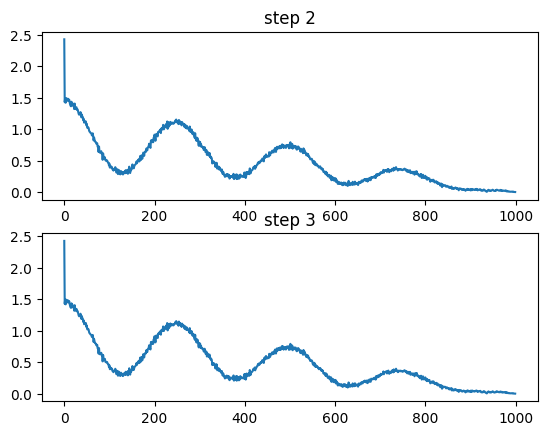

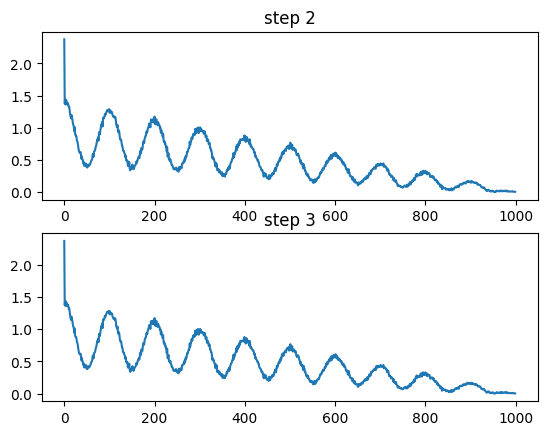

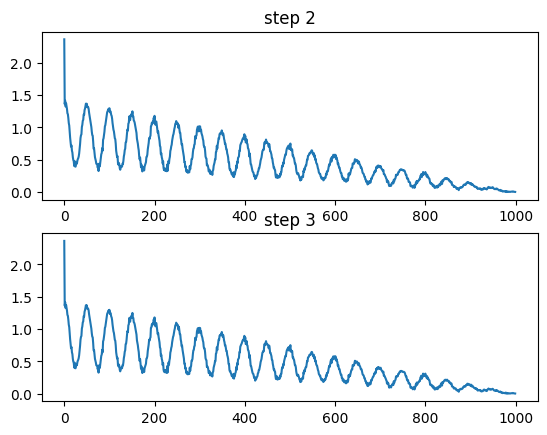

In [60]:
# repeat step 2 and 3
for signal in sin_array:
    temp = signal+noise_signal
    autocorrelation = compute_discrete_autocorrelation(temp)
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(autocorrelation)
    ax[0].set_title('step 2')
    autocorrelation = wiener_khinchin_autocorrelation(temp)
    ax[1].plot(autocorrelation)
    ax[1].set_title('step 3')
    plt.show()

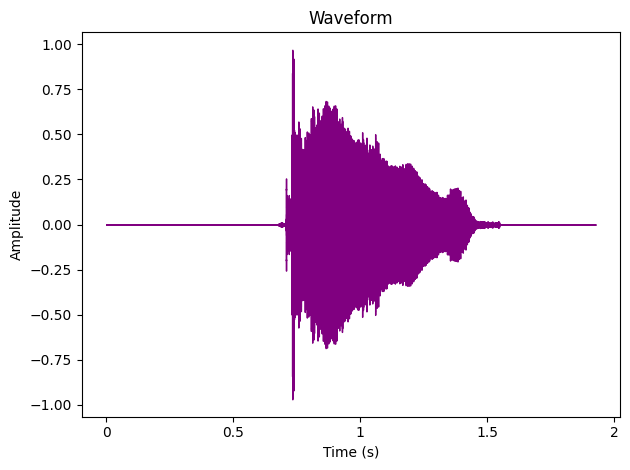

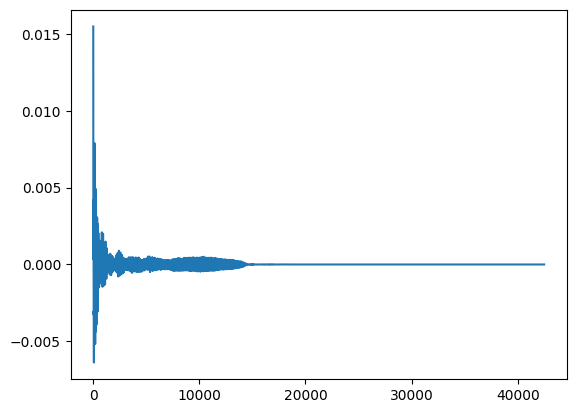

In [ ]:
import librosa
# diphthong au
audio1,sr = librosa.load("D:\\courses contents\\faculty courses\\communication\\speech processing\\labs\\lab3\\Dataset\\ɑʊ_Female.wav")
librosa.display.waveshow(audio1, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio1))
plt.show()



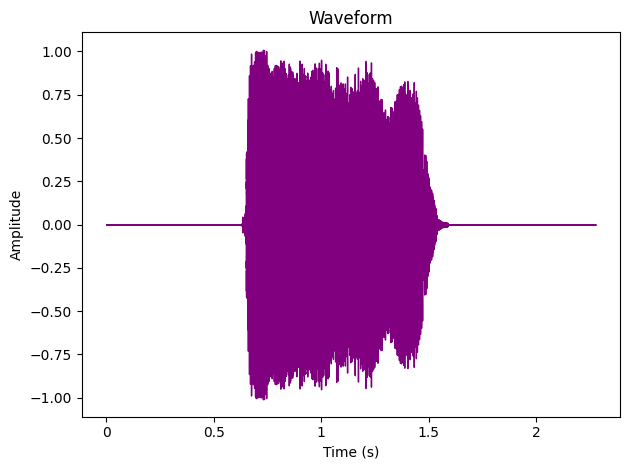

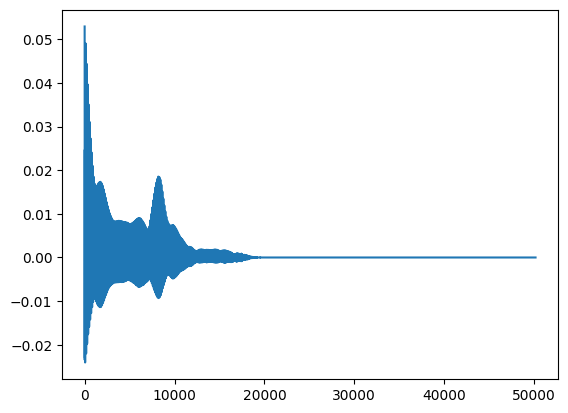

In [63]:
audio2,sr = librosa.load("D:\\courses contents\\faculty courses\\communication\\speech processing\\labs\\lab3\\Dataset\\ɑ_Female.wav")
librosa.display.waveshow(audio2, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio2))
plt.show()


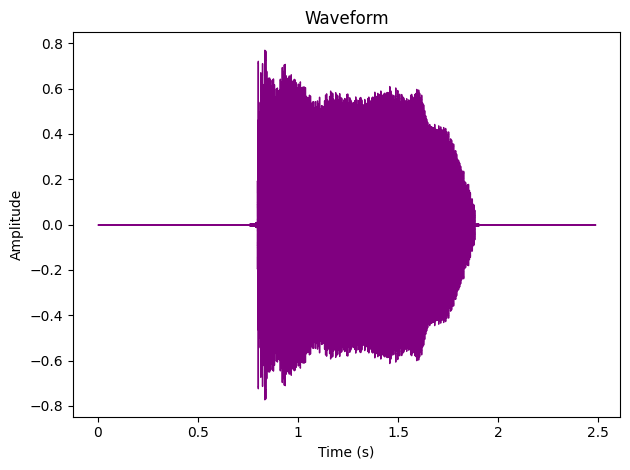

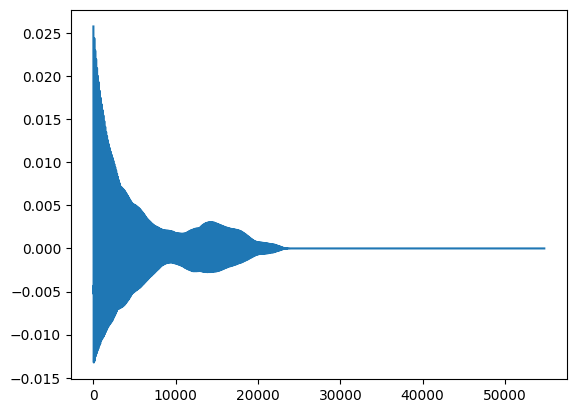

In [ ]:
audio3,sr = librosa.load("D:\\courses contents\\faculty courses\\communication\\speech processing\\labs\\lab3\\Dataset\\o_Female.wav")
librosa.display.waveshow(audio3, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio3))
plt.show()


Conclusion:
 - as high similarity between a vowel and itself (non-dephthong) auto-correlation is high
 - as low similarity in dephthong vowels the correlation is relatively lower

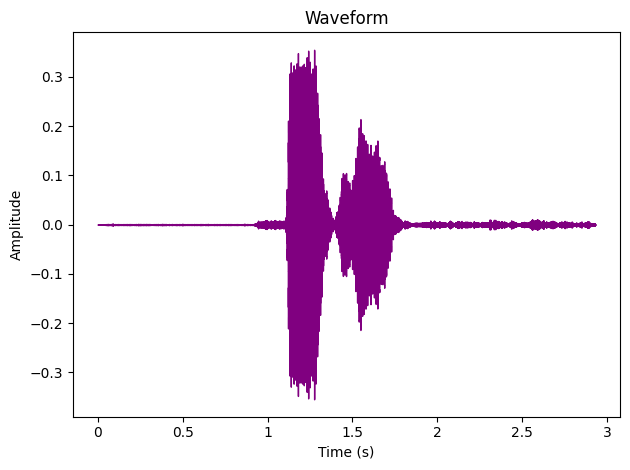

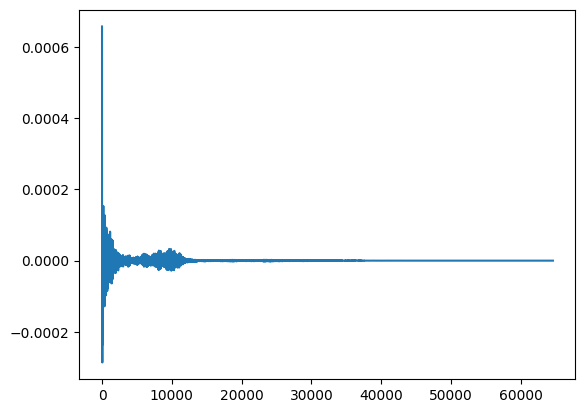

In [65]:
audio3,sr = librosa.load("C:\\Users\\Dell\\Documents\\Sound Recordings\\ama.wav")
librosa.display.waveshow(audio3, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio3))
plt.show()


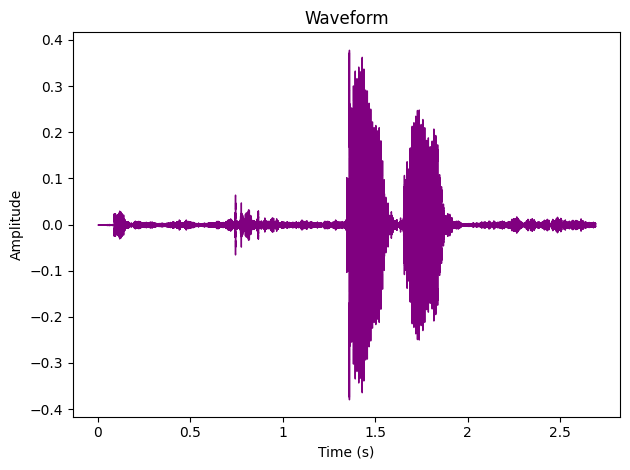

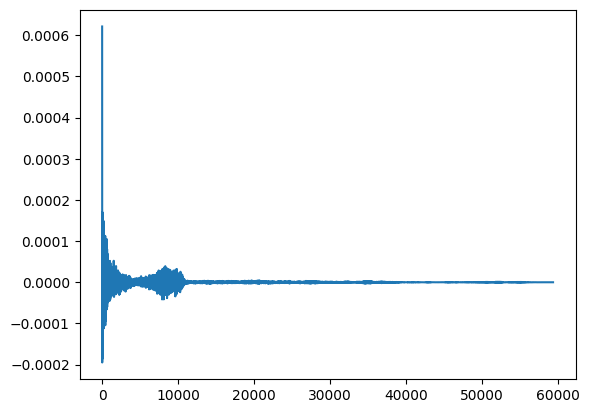

In [66]:
audio3,sr = librosa.load("C:\\Users\\Dell\\Documents\\Sound Recordings\\aga.wav")
librosa.display.waveshow(audio3, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio3))
plt.show()


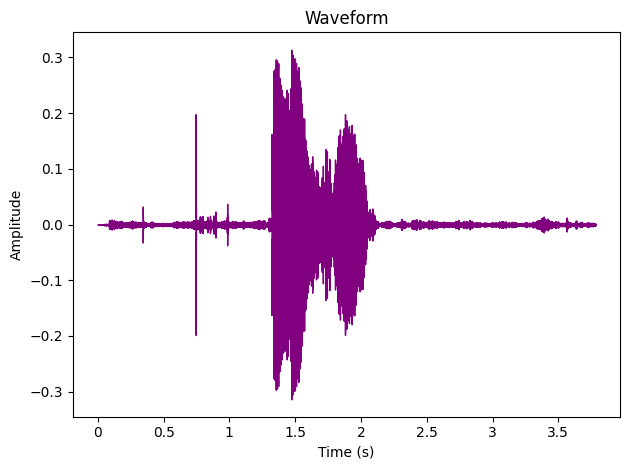

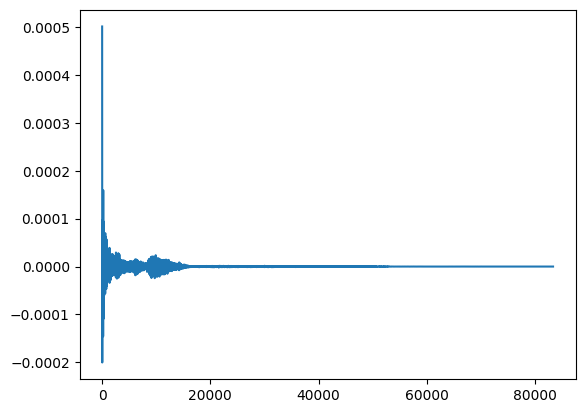

In [67]:
audio3,sr = librosa.load("C:\\Users\\Dell\\Documents\\Sound Recordings\\aza.wav")
librosa.display.waveshow(audio3, sr=sr, color='purple')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
plt.plot(compute_discrete_autocorrelation(audio3))
plt.show()
